# EXERCISES 06-11-23

## Exercise 6.1
Determine the zero of the function g(x) = cos(x) using the bisection method in the interval (0, 4).

Which checks have been omitted in the implementation of the algorithm described in the lesson text that could speed up the result?

In [11]:
import numpy as np

def bisection(f,a,b,prec=0.0001):
    c = a
    while b - a > prec:
        c = 0.5 * (b + a)
        if f(c) * f(b) > 0 : a = c
        else: b = c
    return c

min04 = bisection(np.cos,0,4)
print('Zero of f:[0,4]->R s.t. x |-> cos(x) = ', min04)

Zero of f:[0,4]->R s.t. x |-> cos(x) =  3.99993896484375


Because the function $\cos(x)$ has simmetries, a good algorithm to find minima should be optimized to reduce the function to a simple case (such that $f$ restricted from 0 to $\pi$)

## Exercise 6.2
Perform the previous exercise using a recursive function.

Which of the two implementations is faster?

In [12]:
def bisection_r(f,a,b,prec=0.0001):
    c = 0.5 * (b + a)
    if b - a < prec: return c
    if f(c) * f(b) > 0: return bisection_r(f,c,b,prec)
    else: return bisection_r(f,a,c,prec)

min04 = bisection_r(np.cos,0,4)
print('Zero of f:[0,4]->R s.t. x |-> cos(x) = ', min04)

Zero of f:[0,4]->R s.t. x |-> cos(x) =  3.999969482421875


Their time performance is the same, so they are equivalent in efficency for this case

*bisection_r* is more readable and compact 

## Exercise 6.3
Implement a function that calculates the factorial of a number using a recursive function.

In [13]:
def fact(n):
    if n < 1: raise("Impossible fattorize numbers smaller than 1")
    if n == 1: return n
    else: return n*fact(n-1)

for i in range(1,15):
    print(fact(i))

1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
6227020800
87178291200


## Exercise 6.4
Determine the minimum of the function g(x) = x2 + 7.3x + 4 using the golden ratio search method in the interval (-10, 10).

In [14]:
f = lambda x: (x+2)**2
g = lambda x: x**2 + 7.3*x + 4

def golden_ratio_min(f,a,b,prec=0.0001):
    x2 = a
    while b - a > prec:
        x1 = a + 0.618 * (b - a)
        x2 = a + 0.382 * (b - a)
        if f(x1) < f(x2): a = x2
        else: b = x1
    return x2


print('min of (x-2)^2 (in [-5,5]) is x=',golden_ratio_min(f,-5,5))
print('min of x^2 + 7.3x + 4 (in [-10,10]) is x=',golden_ratio_min(g,-10,10))

min of (x-2)^2 (in [-5,5]) is x= -2.000013750016116
min of x^2 + 7.3x + 4 (in [-10,10]) is x= -3.6499946247592


## Exercise 6.5
Perform the previous exercise using a recursive function.

Which of the two implementations is faster?

In [15]:
f = lambda x: (x+2)**2
g = lambda x: x**2 + 7.3*x + 4

def golden_ratio_min_r(f,a,b,prec=0.0001):
    x1 = a + 0.618 * (b - a)
    x2 = a + 0.382 * (b - a)
    if b - a < prec: return x1
    if f(x1) < f(x2): return golden_ratio_min_r(f,x2,b,prec)
    else: return golden_ratio_min_r(f,a,x1,prec)

print('min of (x-2)^2 (in [-5,5]) is x=',golden_ratio_min_r(f,-5,5))
print('min of x^2 + 7.3x + 4 (in [-10,10]) is x=',golden_ratio_min_r(g,-10,10))

min of (x-2)^2 (in [-5,5]) is x= -2.000013761861483
min of x^2 + 7.3x + 4 (in [-10,10]) is x= -3.64999463380726


same consideration of the previous algorithm

## Exercise 6.6
Complete the two previous exercises by finding the maximum of a chosen function.

In [16]:
f = lambda x: -(x-2)**2

def golden_ratio_max_r(f,a,b,prec=0.0001):
    x1 = a + 0.618 * (b - a)
    x2 = a + 0.382 * (b - a)
    if b - a < prec: return x1
    if f(x1) > f(x2): return golden_ratio_max_r(f,x2,b,prec)
    else: return golden_ratio_max_r(f,a,x1,prec)

print('max of -(x-2)^2 (in [-5,5]) is x=',golden_ratio_max_r(f,-5,5))

max of -(x-2)^2 (in [-5,5]) is x= 2.0000364937441173


## Exercise 6.7
Modifying the previously developed programs, use matplotlib to plot the studied functions and the points found using the bisection and golden section search methods.

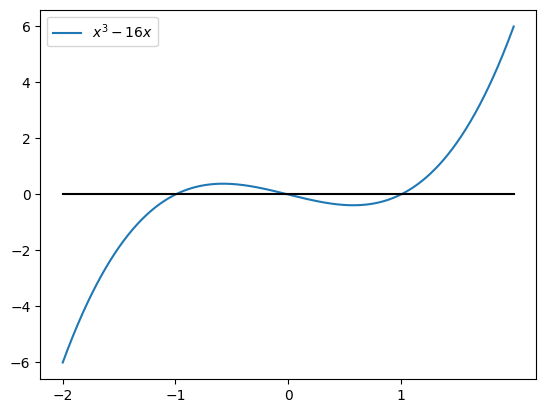

Min: x=0.5773497830967694
Max: x=-0.5773350699041258
Zero: x=-1.500030517578125


In [32]:
from matplotlib import pyplot as plt
import numpy as np

f = lambda x: (x+1)*(x-1)*x

a,b = -2,2
X = np.linspace(a,b,1000)
Y = f(X)

xMin = golden_ratio_min_r(f,a,b)
xMax = golden_ratio_max_r(f,a,b)
zero = bisection_r(f,a,b)

plt.plot(X,Y,label='$x^{3}-16x$')
plt.plot(X,np.zeros(1000),color='black')
plt.legend()
plt.xticks(np.arange(a,b))
plt.show()

print(f"Min: x={xMin}")
print(f"Max: x={xMax}")
print(f"Zero: x={zero}")
